<a href="https://colab.research.google.com/github/nrojasaparicio/Data_Portfolio/blob/main/Motor_Vehicle_Accidents_DS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motor Vehicle Accident Exploratory Data Analysis & Machine Learning Modeling 

The following notebook uses the 'NYC Motor Vehicle Accidents' dataset from NYCOpenData, which covers motor vehicle accidents in NYC from 2019 to the end of 2021 to create a machine learning project to predict the number of people injured and/or killed in motor vehicle accidents using the different features of the dataset. 
    
We begin our preliminary cleanse by excluding NaN values within LATITUDE, LONGITUDE, and ZIP CODE, as well as, the removal of columns not neccesary for our analysis. This is followed by a further exploratory analysis of various factors. We take a deeper look at the accidents over time, injuries, and create regression models for prediction.


## Process Outline 

- Importing Libaries and Data Cleaning
- Exploratory Data Analysis
- Modeling


## I. Import Libraries and Clean Data

In [1]:
#Import libaries and read dataset

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64
import plotly.express as px
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/MVA.csv')
mva = df.copy()
mva.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/6/20,3:52,QUEENS,11420,40.665490,-73.819534,"(40.66549, -73.819534)",NORTH CONDUIT AVENUE,122 STREET,NaN,...,NaN,NaN,NaN,NaN,4355333,Sedan,NaN,NaN,NaN,NaN
1,7/11/20,20:18,BROOKLYN,11234,40.589930,-73.900590,"(40.58993, -73.90059)",NaN,NaN,3159 FLATBUSH AVENUE,...,Driver Inexperience,NaN,NaN,NaN,4327676,Sedan,Sedan,NaN,NaN,NaN
2,1/1/21,4:40,QUEENS,11691,40.601368,-73.760056,"(40.601368, -73.760056)",ROCKAWAY FREEWAY,OCEAN CREST BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,4380776,Pick-up Truck,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,7/24/21,20:38,QUEENS,11434,40.656160,-73.767360,"(40.65616, -73.76736)",ROCKAWAY BOULEVARD,BREWER BOULEVARD,NaN,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,4442158,Sedan,Sedan,NaN,NaN,NaN
4,11/20/20,11:45,QUEENS,11413,40.651405,-73.758896,"(40.651405, -73.758896)",NaN,NaN,230-19 ROCKAWAY BOULEVARD,...,NaN,NaN,NaN,NaN,4369300,Sedan,NaN,NaN,NaN,NaN


In [4]:
mva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282800 entries, 0 to 282799
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     282800 non-null  object 
 1   CRASH TIME                     282800 non-null  object 
 2   BOROUGH                        282800 non-null  object 
 3   ZIP CODE                       282800 non-null  int64  
 4   LATITUDE                       274682 non-null  float64
 5   LONGITUDE                      274682 non-null  float64
 6   LOCATION                       274682 non-null  object 
 7   ON STREET NAME                 176540 non-null  object 
 8   CROSS STREET NAME              176418 non-null  object 
 9   OFF STREET NAME                106260 non-null  object 
 10  NUMBER OF PERSONS INJURED      282800 non-null  int64  
 11  NUMBER OF PERSONS KILLED       282800 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED 

In [5]:
#Drop rows with missing latitudes/longitude since this can not be replaced
mva = mva.dropna(subset=["LATITUDE"])

In [6]:
#Drop rows with missing longitude
mva = mva.dropna(subset=["LONGITUDE"])

In [7]:
#Look to see if any of the latitude and longtitudes are equal to 0 - this means that this is a mistake and should be taken out
print(min(mva['LATITUDE']))
print(min(mva['LONGITUDE']))

0.0
-74.25186


Looks like there are accident latitudes that are equal to zero. We need to drop the rows where this is the case.

In [8]:
mva = mva[mva["LATITUDE"] != 0.0]
print(min(mva["LATITUDE"]))

40.49971


In [9]:
#Convert 'CRASH DATE' and create 'CRASH TIME HOUR' columns to datetime
mva["CRASH DATE"] = pd.to_datetime(mva['CRASH DATE'])
mva["CRASH TIME HOUR"] = pd.to_datetime(mva['CRASH TIME'], format='%H:%M').dt.hour

In [10]:
#Set COLLISION ID as index
mva.set_index('COLLISION_ID', inplace=True)
mva.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH TIME HOUR
COLLISION_ID,,,,,,,,,,,,,,,,,,,,,
4355333,2020-10-06,3:52,QUEENS,11420,40.665490,-73.819534,"(40.66549, -73.819534)",NORTH CONDUIT AVENUE,122 STREET,NaN,...,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,3
4327676,2020-07-11,20:18,BROOKLYN,11234,40.589930,-73.900590,"(40.58993, -73.90059)",NaN,NaN,3159 FLATBUSH AVENUE,...,Driver Inexperience,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN,20
4380776,2021-01-01,4:40,QUEENS,11691,40.601368,-73.760056,"(40.601368, -73.760056)",ROCKAWAY FREEWAY,OCEAN CREST BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,Pick-up Truck,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,4
4442158,2021-07-24,20:38,QUEENS,11434,40.656160,-73.767360,"(40.65616, -73.76736)",ROCKAWAY BOULEVARD,BREWER BOULEVARD,NaN,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN,20
4369300,2020-11-20,11:45,QUEENS,11413,40.651405,-73.758896,"(40.651405, -73.758896)",NaN,NaN,230-19 ROCKAWAY BOULEVARD,...,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,11


In [11]:
#Check for duplicate rows
print(mva.duplicated().sum())
mva.shape

87


(273704, 29)

In [12]:
#Drop duplicate rows
mva.drop_duplicates(inplace=True)
mva.shape

(273617, 29)

In [13]:
#Drop ON STREET, CROSS STREET, and OFF STREET NAME columns - these are not needed since we have lat and longs
mva.drop(['ON STREET NAME'], axis=1, inplace=True)
mva.drop(['CROSS STREET NAME'], axis=1, inplace=True)
mva.drop(['OFF STREET NAME'], axis=1, inplace=True)
mva.drop(['LOCATION'], axis=1, inplace= True) 

In [14]:
#confirm the remaining columns
mva.dtypes

CRASH DATE                       datetime64[ns]
CRASH TIME                               object
BOROUGH                                  object
ZIP CODE                                  int64
LATITUDE                                float64
LONGITUDE                               float64
NUMBER OF PERSONS INJURED                 int64
NUMBER OF PERSONS KILLED                  int64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3            object
CONTRIBUTING FACTOR VEHICLE 4            object
CONTRIBUTING FACTOR VEHICLE 5            object
VEHICLE TYPE CODE 1                      object
VEHICLE TYPE CODE 2                     

In [15]:
#rename columns for ease of use
mva = mva.rename(columns={'ZIP CODE': 'ZIP_CODE','NUMBER OF PERSONS INJURED': 'PERSONS_INJURED', 
                            'NUMBER OF PERSONS KILLED': 'PERSONS_KILLED', 
                            'NUMBER OF PEDESTRIANS INJURED': 'PEDESTRIANS_INJURED', 
                            'NUMBER OF PEDESTRIANS KILLED': 'PEDESTRIANS_KILLED',
                            'NUMBER OF CYCLIST INJURED': 'CYCLISTS_INJURED',  
                            'NUMBER OF CYCLIST KILLED': 'CYCLISTS_KILLED',
                            'NUMBER OF MOTORIST INJURED': 'MOTORIST_INJURED',
                            'NUMBER OF MOTORIST KILLED': 'MOTORIST_KILLED',
                                      'CONTRIBUTING FACTOR VEHICLE 1': 'FACTOR_1', 
                                      'CONTRIBUTING FACTOR VEHICLE 2': 'FACTOR_2',
                                      'CONTRIBUTING FACTOR VEHICLE 3': 'FACTOR_3',
                                      'CONTRIBUTING FACTOR VEHICLE 4': 'FACTOR_4',
                                      'CONTRIBUTING FACTOR VEHICLE 5': 'FACTOR_5',
                                          'VEHICLE TYPE CODE 1': 'VEHICLE_1',
                                          'VEHICLE TYPE CODE 2': 'VEHICLE_2',
                                          'VEHICLE TYPE CODE 3': 'VEHICLE_3',
                                          'VEHICLE TYPE CODE 4': 'VEHICLE_4',
                                          'VEHICLE TYPE CODE 5': 'VEHICLE_5'
                                     })

In [16]:
mva.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,PERSONS_INJURED,PERSONS_KILLED,PEDESTRIANS_INJURED,PEDESTRIANS_KILLED,...,FACTOR_2,FACTOR_3,FACTOR_4,FACTOR_5,VEHICLE_1,VEHICLE_2,VEHICLE_3,VEHICLE_4,VEHICLE_5,CRASH TIME HOUR
COLLISION_ID,,,,,,,,,,,,,,,,,,,,,
4355333,2020-10-06,3:52,QUEENS,11420,40.665490,-73.819534,1,3,0,0,...,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,3
4327676,2020-07-11,20:18,BROOKLYN,11234,40.589930,-73.900590,4,3,0,0,...,Driver Inexperience,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN,20
4380776,2021-01-01,4:40,QUEENS,11691,40.601368,-73.760056,1,2,0,0,...,Unspecified,NaN,NaN,NaN,Pick-up Truck,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,4
4442158,2021-07-24,20:38,QUEENS,11434,40.656160,-73.767360,4,2,0,0,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN,20
4369300,2020-11-20,11:45,QUEENS,11413,40.651405,-73.758896,2,2,0,0,...,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,11


## II. Exploratory Data Analysis

In [17]:
#Total number of accidents
print('Total number of accidents from 2019 to 2021: {}'.format(mva.shape[0]))

Total number of accidents from 2019 to 2021: 273617


#### Examining Number of Accidents by Month

In [18]:
#Extract month from 'CRASH DATE' column to create 'CRASH MONTH' column
mva['CRASH MONTH'] = pd.to_datetime(mva['CRASH DATE']).dt.month 
monthly_accidents = mva.groupby(mva['CRASH MONTH']).size()
    

monthly_accidents

CRASH MONTH
1     24864
2     23189
3     22998
4     18425
5     22538
6     23811
7     24080
8     23221
9     23341
10    23282
11    22291
12    21577
dtype: int64

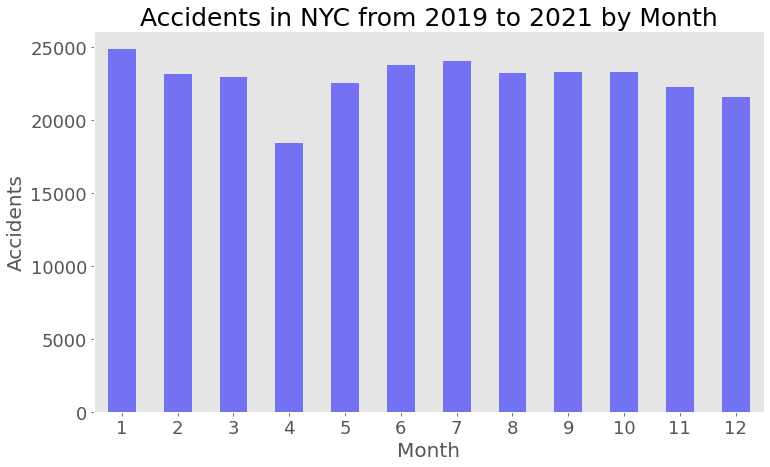

In [19]:
plt.style.use('ggplot')

#Plot accidents per month
monthly_accidents.plot(kind='bar', color='blue',figsize=(12,7), alpha=0.5)

plt.title('Accidents in NYC from 2019 to 2021 by Month', fontsize=25)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Accidents',fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18,rotation=0)
plt.grid(False);


At first glance, the month with the highest number of accidents is January and the one with the lowest is April.


#### Distribution of Accidents - Day of the Week

In [20]:
#Extract weekdate from 'CRASH DATE' column to create 'CRASH WEEKDAY' column
mva["CRASH WEEKDAY"] = mva["CRASH DATE"].dt.weekday
weekday_accidents = mva.groupby(["CRASH WEEKDAY"]).size()

weekday_accidents

CRASH WEEKDAY
0    39104
1    40103
2    39610
3    40539
4    43569
5    37561
6    33131
dtype: int64

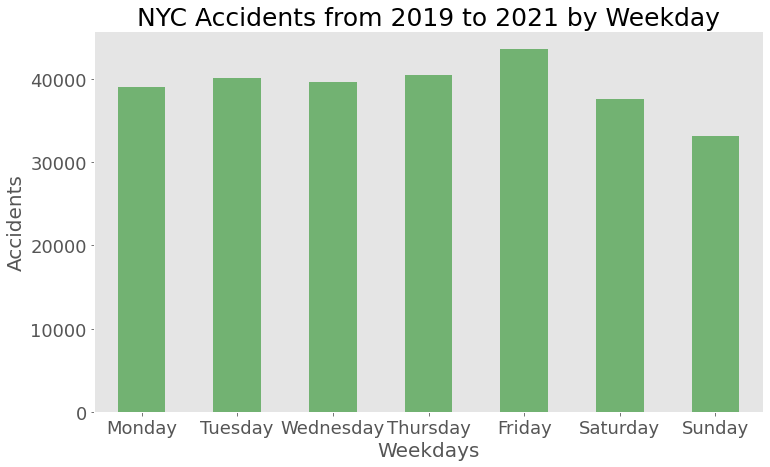

In [21]:
#Change the numerical weekdays to text for graph
import calendar
weekday_accidents.index=[calendar.day_name[x] for x in range(0,7)]

#Plot accidents by weekday
weekday_accidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5)

# title and x,y labels
plt.title('NYC Accidents from 2019 to 2021 by Weekday', fontsize=25)
plt.xlabel('Weekdays',fontsize=20)
plt.ylabel('Accidents',fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18,rotation=0)
plt.grid(False);

Friday has the highest volume of accidents, and Sunday has the lowest volume of accidents. 

#### Distribution of Accidents - Time of Day

In [22]:
#Determining count of accidents by the hour
hourly_accidents = mva.groupby(["CRASH TIME HOUR"]).size()
    
hourly_accidents

CRASH TIME HOUR
0     10276
1      4960
2      3892
3      3372
4      3489
5      3807
6      5942
7      8526
8     14077
9     13486
10    13157
11    14147
12    15357
13    16021
14    18448
15    17504
16    19035
17    18663
18    16654
19    13849
20    11843
21    10193
22     9260
23     7659
dtype: int64

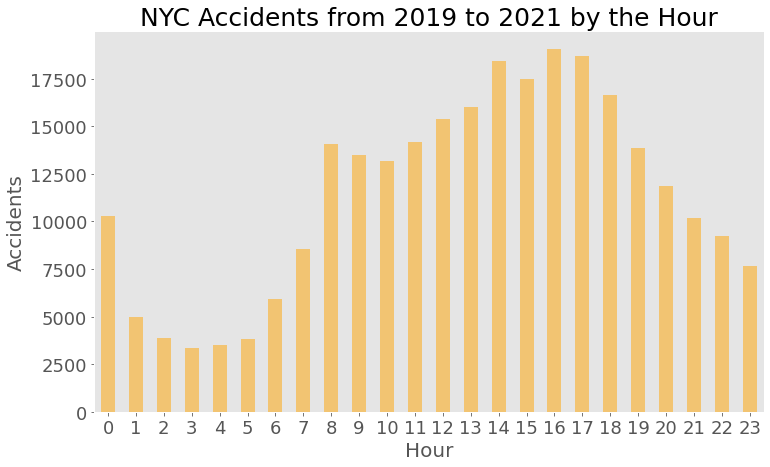

In [23]:
# plot accidents per hour
hourly_accidents.plot(kind='bar',figsize=(12,7), color='orange', alpha=0.5)

# title and x,y labels
plt.title('NYC Accidents from 2019 to 2021 by the Hour', fontsize=25)
plt.xlabel('Hour',fontsize=20)
plt.ylabel('Accidents',fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18,rotation=0)
plt.grid(False);

Here we see that 3 AM is the hour with the least amount of accidents. The peak times are between 2 PM and 5 PM. 

#### Injury / Death Analysis

In [24]:
#Find descriptive statistics for columns and look for any columns with missing values
mva.describe()

,ZIP_CODE,LATITUDE,LONGITUDE,PERSONS_INJURED,PERSONS_KILLED,PEDESTRIANS_INJURED,PEDESTRIANS_KILLED,CYCLISTS_INJURED,CYCLISTS_KILLED,MOTORIST_INJURED,MOTORIST_KILLED,CRASH TIME HOUR,CRASH MONTH,CRASH WEEKDAY
count,273617.000000,273617.000000,273617.000000,273617.000000,273617.000000,273617.000000,273617.000000,273617.000000,273617.000000,273617.000000,273617.000000,273617.000000,273617.000000,273617.000000
mean,10898.327947,40.723670,-73.912391,0.337885,0.001473,0.066125,0.000746,0.039753,0.000172,0.226430,0.000530,13.161737,6.471944,2.930399
std,527.298094,0.080089,0.079380,0.687673,0.039753,0.261305,0.027561,0.198275,0.013105,0.640495,0.024847,5.847615,3.456233,1.952060
min,10000.000000,40.499710,-74.251860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,10457.000000,40.666317,-73.964850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,3.000000,1.000000
50%,11209.000000,40.714622,-73.917870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,7.000000,3.000000
75%,11354.000000,40.771015,-73.865425,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,9.000000,5.000000
max,11697.000000,40.912884,-73.700584,18.000000,3.000000,7.000000,2.000000,3.000000,1.000000,18.000000,3.000000,23.000000,12.000000,6.000000


This boxplot confirms that the count of persons and pedestrians killed and injured in accidents have skewed distributions due to high outliers. Most accidents have injuries between 0 to 2. We need to keep this mind going forward when running a model on this data. 

In [25]:
#Create columns with a combination of injuries and deaths

mva['TOTAL_INJURED_OR_KILLED'] = mva['PERSONS_INJURED'] + mva['PERSONS_KILLED']
+ mva['PEDESTRIANS_INJURED'] + mva['PEDESTRIANS_KILLED']

mva['TOTAL_INJURED'] = mva['PERSONS_INJURED'] + mva['CYCLISTS_INJURED']
+ mva['PEDESTRIANS_INJURED'] + mva['MOTORIST_INJURED']

mva['TOTAL_KILLED'] = mva['PERSONS_KILLED'] + mva['CYCLISTS_KILLED']
+ mva['PEDESTRIANS_KILLED'] + mva['MOTORIST_KILLED']

mva.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,PERSONS_INJURED,PERSONS_KILLED,PEDESTRIANS_INJURED,PEDESTRIANS_KILLED,...,VEHICLE_2,VEHICLE_3,VEHICLE_4,VEHICLE_5,CRASH TIME HOUR,CRASH MONTH,CRASH WEEKDAY,TOTAL_INJURED_OR_KILLED,TOTAL_INJURED,TOTAL_KILLED
COLLISION_ID,,,,,,,,,,,,,,,,,,,,,
4355333,2020-10-06,3:52,QUEENS,11420,40.665490,-73.819534,1,3,0,0,...,NaN,NaN,NaN,NaN,3,10,1,4,1,3
4327676,2020-07-11,20:18,BROOKLYN,11234,40.589930,-73.900590,4,3,0,0,...,Sedan,NaN,NaN,NaN,20,7,5,7,4,3
4380776,2021-01-01,4:40,QUEENS,11691,40.601368,-73.760056,1,2,0,0,...,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,4,1,4,3,1,2
4442158,2021-07-24,20:38,QUEENS,11434,40.656160,-73.767360,4,2,0,0,...,Sedan,NaN,NaN,NaN,20,7,5,6,4,2
4369300,2020-11-20,11:45,QUEENS,11413,40.651405,-73.758896,2,2,0,0,...,NaN,NaN,NaN,NaN,11,11,4,4,2,2


In [26]:
#drop columns with injuries tied to specific groups
mva = mva.drop(["PERSONS_INJURED","PERSONS_KILLED","PEDESTRIANS_INJURED","PEDESTRIANS_KILLED",
                "CYCLISTS_INJURED","CYCLISTS_KILLED","MOTORIST_INJURED","MOTORIST_KILLED"], axis=1)

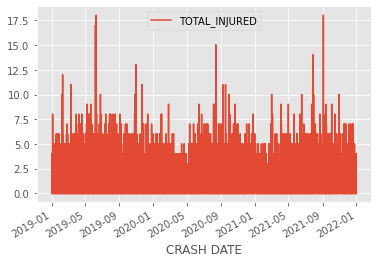

In [27]:
#create a time-series line plot of the total injured people
ax = mva.plot.line(y='TOTAL_INJURED', x="CRASH DATE")


Severity Scoring 

When looking at motor vehicle accident-related injuries and deaths, we wanted to create a Severity Score for each accident where either injuries or deaths were present. We decided upon 3 Severity Scores levels, ranging from 1 being the least severe with no injuries or deaths in accidents and 4 being the most severe. Having a classification for the severity of the accident helps us determine later on what contributing factors are more likely to cause severe accidents. 

In [28]:
#Creating Severity Score function and assigning scores to accidents

def severity_scoring(row):  
    if row['TOTAL_KILLED'] >= 1.0:
        return 4
    elif row['TOTAL_INJURED'] > 4.0 and row['TOTAL_KILLED'] == 0.0:
        return 4
    elif row['TOTAL_INJURED'] > 2.0 and row['TOTAL_INJURED'] <= 4.0 and row['TOTAL_KILLED'] == 0.0:
        return 3
    elif row['TOTAL_INJURED'] > 0.0 and row['TOTAL_INJURED'] <= 2.0 and row['TOTAL_KILLED'] == 0.0:
        return 2
    elif row['TOTAL_INJURED'] == 0.0 and row['TOTAL_KILLED'] == 0.0:
        return 1

mva['SEVERITY'] = mva.apply(lambda row: severity_scoring(row), axis=1)


In [29]:
mva.describe()

,ZIP_CODE,LATITUDE,LONGITUDE,CRASH TIME HOUR,CRASH MONTH,CRASH WEEKDAY,TOTAL_INJURED_OR_KILLED,TOTAL_INJURED,TOTAL_KILLED,SEVERITY
count,273617.000000,273617.000000,273617.000000,273617.000000,273617.000000,273617.000000,273617.000000,273617.000000,273617.000000,273617.000000
mean,10898.327947,40.723670,-73.912391,13.161737,6.471944,2.930399,0.339358,0.377637,0.001645,1.282928
std,527.298094,0.080089,0.079380,5.847615,3.456233,1.952060,0.689101,0.754112,0.045852,0.505999
min,10000.000000,40.499710,-74.251860,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,10457.000000,40.666317,-73.964850,9.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,11209.000000,40.714622,-73.917870,14.000000,7.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,11354.000000,40.771015,-73.865425,18.000000,9.000000,5.000000,1.000000,1.000000,0.000000,2.000000
max,11697.000000,40.912884,-73.700584,23.000000,12.000000,6.000000,18.000000,18.000000,3.000000,4.000000


In [30]:
mva['SEVERITY'].value_counts()

1    202482
2     65849
3      4293
4       993
Name: SEVERITY, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7703830190>]],
      dtype=object)

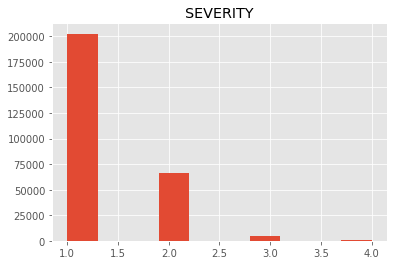

In [31]:
mva.hist(column="SEVERITY")

In [32]:
mva.dtypes

CRASH DATE                 datetime64[ns]
CRASH TIME                         object
BOROUGH                            object
ZIP_CODE                            int64
LATITUDE                          float64
LONGITUDE                         float64
FACTOR_1                           object
FACTOR_2                           object
FACTOR_3                           object
FACTOR_4                           object
FACTOR_5                           object
VEHICLE_1                          object
VEHICLE_2                          object
VEHICLE_3                          object
VEHICLE_4                          object
VEHICLE_5                          object
CRASH TIME HOUR                     int64
CRASH MONTH                         int64
CRASH WEEKDAY                       int64
TOTAL_INJURED_OR_KILLED             int64
TOTAL_INJURED                       int64
TOTAL_KILLED                        int64
SEVERITY                            int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f770385ef10>,
      dtype=object)

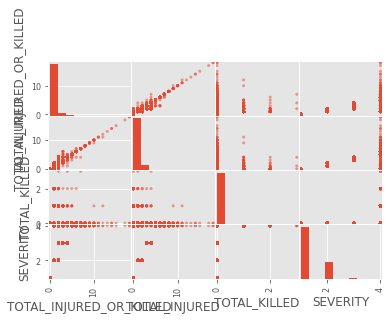

In [33]:
# Create a scatter matrix - make it prettier
pd.plotting.scatter_matrix(mva.iloc[:,19:])

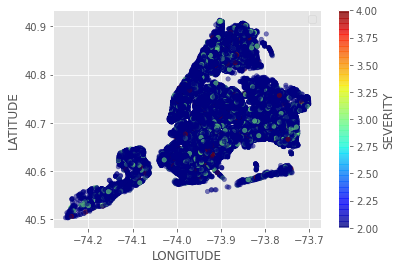

In [34]:
#Creating scatterplot plotting accidents by severity levels 2 or higher - make fig size bigger and change cmap
mva_severe = mva[mva['SEVERITY'] > 1]
mva_severe.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', alpha=0.5,
         c="SEVERITY", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
         
plt.legend()

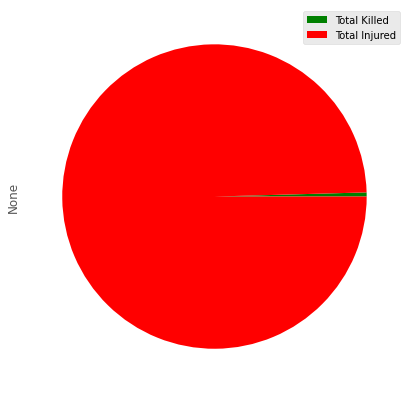

In [35]:
#PIE Chart of Total Injured vs Total Injured

injuries = mva[['TOTAL_KILLED', 'TOTAL_INJURED']].sum()

injuries.plot(kind='pie',figsize=(7,7), colors=['green','red'], labels=None)
plt.legend(labels=['Total Killed', 'Total Injured'])

### Contributing Factors



In [36]:
mva.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,FACTOR_1,FACTOR_2,FACTOR_3,FACTOR_4,...,VEHICLE_3,VEHICLE_4,VEHICLE_5,CRASH TIME HOUR,CRASH MONTH,CRASH WEEKDAY,TOTAL_INJURED_OR_KILLED,TOTAL_INJURED,TOTAL_KILLED,SEVERITY
COLLISION_ID,,,,,,,,,,,,,,,,,,,,,
4355333,2020-10-06,3:52,QUEENS,11420,40.665490,-73.819534,Unsafe Speed,NaN,NaN,NaN,...,NaN,NaN,NaN,3,10,1,4,1,3,4
4327676,2020-07-11,20:18,BROOKLYN,11234,40.589930,-73.900590,Driver Inexperience,Driver Inexperience,NaN,NaN,...,NaN,NaN,NaN,20,7,5,7,4,3,4
4380776,2021-01-01,4:40,QUEENS,11691,40.601368,-73.760056,Unsafe Speed,Unspecified,NaN,NaN,...,NaN,NaN,NaN,4,1,4,3,1,2,4
4442158,2021-07-24,20:38,QUEENS,11434,40.656160,-73.767360,Unsafe Speed,Failure to Yield Right-of-Way,NaN,NaN,...,NaN,NaN,NaN,20,7,5,6,4,2,4
4369300,2020-11-20,11:45,QUEENS,11413,40.651405,-73.758896,Driver Inattention/Distraction,NaN,NaN,NaN,...,NaN,NaN,NaN,11,11,4,4,2,2,4


In [37]:
#creating function to extract the top 10 contributing factors in motor vehicle accidents

def contributing_factor(mva):
    
    # create df of contributing factors
    contrib_factors = ['FACTOR_1', 'FACTOR_2',
                      'FACTOR_3','FACTOR_4','FACTOR_5'] 
    
    #create new dataframe with only contributing factors -- filter out severity 1
    con_mva = pd.DataFrame(data=mva,columns=contrib_factors)
    
    #reset index in newly created dataframe
    con_mva = con_mva.reset_index()
    
    #pd melt to convert wide to narrow format
    contrib_df = pd.melt(con_mva, id_vars=["COLLISION_ID"], value_vars = contrib_factors)

    #drop duplicates
    factors = contrib_df.drop_duplicates(keep = "first").dropna()
    
    #groupby 
    factors_most_acc = factors.groupby(["value"]).count()
    factors_most_acc = factors_most_acc.sort_values("variable", ascending = False)
    
    #grab top 6
    factors_most_acc = factors_most_acc.head(10)
    
    return factors_most_acc

contributing_factor(mva)

,COLLISION_ID,variable
value,,
Unspecified,286671,286671
Driver Inattention/Distraction,82256,82256
Failure to Yield Right-of-Way,22324,22324
Following Too Closely,15900,15900
Backing Unsafely,13876,13876
Passing Too Closely,13391,13391
Passing or Lane Usage Improper,13129,13129
Other Vehicular,11740,11740
Traffic Control Disregarded,7113,7113


Unfortunately, a significant portion of the contributing factors fall under the Unspecified category. MAYBE DO SOME GOOGLE AS TO WHY MAYBE THEY ARE NOT ABLE TO DETECT THE CAUSE

## III. Modeling

I am planning on using an OLS Regression model to predict the number of people injured and/or killed in accidents based on different attributes. I will first start off by creating QQ plots of the TOTAL_INJURED and the TOTAL_KILLED columns to see what distributions they have and whether we have to transform them which we will use later on in the OLS Regression model. 



### Quantile-Quantile Plots



In [38]:
mva.dtypes

CRASH DATE                 datetime64[ns]
CRASH TIME                         object
BOROUGH                            object
ZIP_CODE                            int64
LATITUDE                          float64
LONGITUDE                         float64
FACTOR_1                           object
FACTOR_2                           object
FACTOR_3                           object
FACTOR_4                           object
FACTOR_5                           object
VEHICLE_1                          object
VEHICLE_2                          object
VEHICLE_3                          object
VEHICLE_4                          object
VEHICLE_5                          object
CRASH TIME HOUR                     int64
CRASH MONTH                         int64
CRASH WEEKDAY                       int64
TOTAL_INJURED_OR_KILLED             int64
TOTAL_INJURED                       int64
TOTAL_KILLED                        int64
SEVERITY                            int64
dtype: object

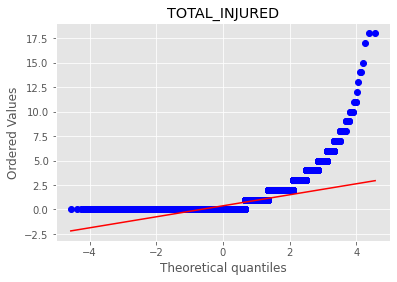

In [39]:
## QQ plot of TOTAL_INJURED using normal distribution
stats.probplot(x=mva['TOTAL_INJURED'], dist="norm", plot=plt)
plt.title("TOTAL_INJURED")
plt.show()

Looking at this QQ plot for TOTAL_INJURED, we see that the TOTAL_INJURED column does not fit into the normal distribution. We will need to transform this for the model. Let's examine other distributions. 

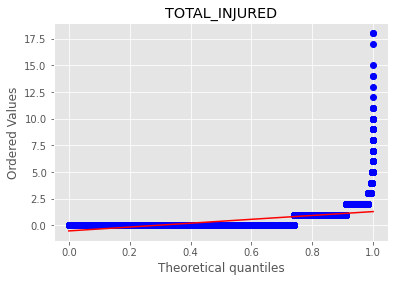

In [40]:
## QQ plot of TOTAL_INJURED using uniform distribution
stats.probplot(x=mva['TOTAL_INJURED'],dist='uniform', fit=True, plot=plt)
plt.title("TOTAL_INJURED")
plt.show()

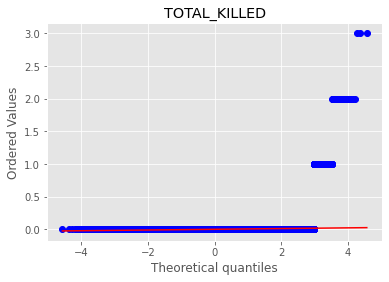

In [41]:
stats.probplot(x=mva['TOTAL_KILLED'], dist="norm", plot=plt)
plt.title("TOTAL_KILLED")
plt.show()

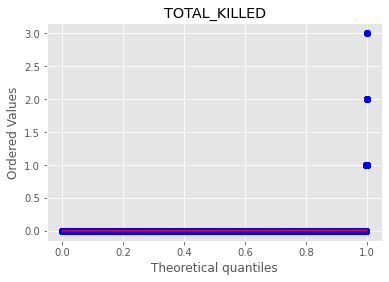

In [42]:
## QQ plot of TOTAL_KILLED using uniform distribution
stats.probplot(x=mva['TOTAL_KILLED'],dist='uniform', fit=True, plot=plt)
plt.title("TOTAL_KILLED")
plt.show()

### Preparing Training Set for ML Model

Here, we split the dataset between training and test since this is for prediction. 

#### Managing Categorical Columns

In the Motor Vehicle Accidents dataset, there are two major categories we have to turn into numbers for the model: Contributing Factor columns and Vehicle columns. 

For contributing factors, we narrowed down the factors to 11 overarching contribution factor categories. 

In [43]:
#12 categories

mva = mva.replace({ 'Accelerator Defective' : 'Car Defect/Technical Issue',
'Aggressive Driving/Road Rage' : 'Aggressive Driving/Road Rage',
'Alcohol Involvement' : 'Alcohol',
'Animals Action' : 'Hazardous Driving/Condition',
'Backing Unsafely' : 'Decision Making',
'Brakes Defective' : 'Car Defect/Technical Issue',
'Cell Phone (hands-free)' : 'Phone',
'Cell Phone (hand-Held)' : 'Phone',
'Driver Inattention/Distraction' : 'Distracted/Inattention',
'Driver Inexperience' : 'Decision Making',
'Driverless/Runaway Vehicle' : 'Other Parties',
'Drugs (illegal)' : 'Impairment',
'Eating or Drinking' : 'Distracted/Inattention',
'Failure to Keep Right' : 'Decision Making',
'Failure to Yield Right-of-Way' : 'Decision Making',
'Fatigued/Drowsy' : 'Impairment',
'Fell Asleep' : 'Impairment',
'Following Too Closely' : 'Decision Making',
'Glare' : 'Hazardous Driving/Condition',
'Headlights Defective' : 'Car Defect/Technical Issue',
'Illnes' : 'Impairment',
'Lane Marking Improper/Inadequate' : 'Hazardous Driving/Condition',
'Listening/Using Headphones' : 'Distracted/Inattention',
'Lost Consciousness' : 'Impairment',
'Obstruction/Debris' : 'Hazardous Driving/Condition',
'Other Electronic Device' : 'Distracted/Inattention',
'Other Lighting Defects' : 'Hazardous Driving/Condition',
'Other Vehicular' : 'Other Parties',
'Outside Car Distraction' : 'Distracted/Inattention',
'Oversized Vehicle' : 'Miscellaneous',
'Passenger Distraction' : 'Decision Making',
'Passing or Lane Usage Improper' : 'Decision Making',
'Passing Too Closely' : 'Decision Making',
'Pavement Defective' : 'Hazardous Driving/Condition',
'Pavement Slippery' : 'Hazardous Driving/Condition',
'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion' : 'Other Parties',
'Physical Disability' : 'Miscellaneous',
'Prescription Medication' : 'Impairment',
'Reaction to Uninvolved Vehicle' : 'Decision Making',
'Shoulders Defective/Improper' : 'Hazardous Driving/Condition',
'Steering Failure' : 'Car Defect/Technical Issue',
'Texting' : 'Phone',
'Tinted Windows' : 'Miscellaneous',
'Tire Failure/Inadequate' : 'Car Defect/Technical Issue',
'Tow Hitch Defective' : 'Other Parties',
'Traffic Control Device Improper/Non-Working' : 'Hazardous Driving/Condition',
'Traffic Control Disregarded' : 'Decision Making',
'Turning Improperly' : 'Decision Making',
'Unsafe Lane Changing' : 'Decision Making',
'Unsafe Speed' : 'Decision Making',
'Unspecified' : 'Unspecified',
'Using On Board Navigation Device' : 'Distracted/Inattention',
'Vehicle Vandalism' : 'Other Parties',
'View Obstructed/Limited' : 'Miscellaneous',
'Windshield Inadequate' : 'Car Defect/Technical Issue',
'nan' : 'nan'})

In [44]:
#12 int categories

mva = mva.replace({'Aggressive Driving/Road Rage' : 1,
'Alcohol' : 2,
'Car Defect/Technical Issue' : 3,
'Decision Making' : 4,
'Distracted/Inattention' : 5,
'Hazardous Driving/Condition' : 6,
'Impairment' : 7,
'Miscellaneous' : 8,
'nan' : 0,                                          
'Other Parties' : 10,
'Phone' : 11,
'Unspecified' : 12})


In [45]:
mva['FACTOR_1'] = mva['FACTOR_1'].replace(np.NaN, 0)
mva['FACTOR_2'] = mva['FACTOR_2'].replace(np.NaN, 0)
mva['FACTOR_3'] = mva['FACTOR_3'].replace(np.NaN, 0)
mva['FACTOR_4'] = mva['FACTOR_4'].replace(np.NaN, 0)
mva['FACTOR_5'] = mva['FACTOR_5'].replace(np.NaN, 0)



In [46]:
mva['FACTOR_4'].unique()

array([ 0., 12., 10.,  4.,  5.,  2.,  6.,  3.,  7.,  1.])

Now let's turn the BOROUGH and multiple vehicle columns into numerical values.

In [47]:
#finding unique values in BOROUGH column
mva['BOROUGH'].unique()

array(['QUEENS', 'BROOKLYN', 'BRONX', 'STATEN ISLAND', 'MANHATTAN'],
      dtype=object)

In [48]:
#replace boroughs with numerical values
mva = mva.replace({'BRONX' : 1,
                   'BROOKLYN' : 2,
                   'MANHATTAN' : 3,
                   'QUEENS' : 4,
                   'STATEN ISLAND' : 5})

In [49]:
#validate replacement
mva['BOROUGH'].unique()

array([4, 2, 1, 5, 3])

In [50]:
#finding unique values in vehicle columns
mva_vehicle = mva.reset_index()
mva_vehicle = pd.melt(mva_vehicle, id_vars=['COLLISION_ID'], value_vars=['VEHICLE_1','VEHICLE_2','VEHICLE_3','VEHICLE_4','VEHICLE_5'])
mva_vehicle = mva_vehicle.drop_duplicates(subset=['variable','value'], keep = "first").dropna()
mva_vehicle.head()

,COLLISION_ID,variable,value
0,4355333,VEHICLE_1,Sedan
2,4380776,VEHICLE_1,Pick-up Truck
7,4487222,VEHICLE_1,Station Wagon/Sport Utility Vehicle
9,4429676,VEHICLE_1,Motorcycle
14,4135659,VEHICLE_1,Garbage or Refuse


In [51]:
mva_vehicle['value'].value_counts()

Sedan        5
Dump         5
Bike         5
Van          5
Ambulance    5
            ..
POLIC        1
pedicab      1
Horse        1
LTRL         1
FRONT        1
Name: value, Length: 1068, dtype: int64

There are 1068 unique values shared between the 5 vehicle columns. Until I find a suitable way of transforming these categorical variables for the models, I will be dropping them from the dataset. 

In [52]:
#dropping vehicle columns
mva = mva.drop(["VEHICLE_1","VEHICLE_2","VEHICLE_3","VEHICLE_4","VEHICLE_5"], axis=1)

In [53]:
mva.dtypes

CRASH DATE                 datetime64[ns]
CRASH TIME                         object
BOROUGH                             int64
ZIP_CODE                            int64
LATITUDE                          float64
LONGITUDE                         float64
FACTOR_1                          float64
FACTOR_2                          float64
FACTOR_3                          float64
FACTOR_4                          float64
FACTOR_5                          float64
CRASH TIME HOUR                     int64
CRASH MONTH                         int64
CRASH WEEKDAY                       int64
TOTAL_INJURED_OR_KILLED             int64
TOTAL_INJURED                       int64
TOTAL_KILLED                        int64
SEVERITY                            int64
dtype: object

### Evaluating OLS Regression Model on Training Set

In [54]:
#create training and test sets
from sklearn.model_selection import train_test_split

mva_train_set, mva_test_set = train_test_split(mva, test_size=0.3, random_state=42)

Now we will use the OLS model to predict the total number of people injured and/or killed in the test dataset by using the first factor. 

In [55]:
model = smf.ols(formula='TOTAL_INJURED_OR_KILLED ~ FACTOR_1', data=mva_test_set).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     TOTAL_INJURED_OR_KILLED   R-squared:                       0.005
Model:                                 OLS   Adj. R-squared:                  0.005
Method:                      Least Squares   F-statistic:                     378.1
Date:                     Sat, 22 Oct 2022   Prob (F-statistic):           5.10e-84
Time:                             01:36:14   Log-Likelihood:                -85836.
No. Observations:                    82086   AIC:                         1.717e+05
Df Residuals:                        82084   BIC:                         1.717e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4275      0.005     82.466      0.000       0.417       0.438
FACTOR_1      -0.0132      0.001    -19.444      0.000      -0.015      -0.012
==============================================================================
Omnibus:                    64181.735   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2520545.243
Skew:                           3.445   Prob(JB):                         0.00
Kurtosis:                      29.258   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#run model on training set for the persons_injured and the first contributing factor listed
formed_vars = smf.ols(formula='TOTAL_INJURED ~ FACTOR_1', data=mva_train_set).fit()
formed_vars.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TOTAL_INJURED   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     838.2
Date:                Sat, 22 Oct 2022   Prob (F-statistic):          6.58e-184
Time:                        01:36:15   Log-Likelihood:            -2.1732e+05
No. Observations:              191531   AIC:                         4.346e+05
Df Residuals:                  191529   BIC:                         4.347e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4734      0.004    127.693      0.000       0.466       0.481
FACTOR_1      -0.0141      0.000    -28.952      0.000      -0.015      -0.013
==============================================================================
Omnibus:                   119853.974   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1831464.745
Skew:                           2.782   Prob(JB):                         0.00
Kurtosis:                      17.090   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
predict_formed_vars = formed_vars.predict(mva_test_set)
predict_formed_vars

COLLISION_ID
4120749    0.445160
4364475    0.416946
4166170    0.416946
4352224    0.402839
4173427    0.416946
             ...   
4142899    0.304089
4144444    0.416946
4460825    0.304089
4076711    0.416946
4081376    0.402839
Length: 82086, dtype: float64

In [58]:
model_pre_dict = smf.ols(formula='TOTAL_KILLED ~ FACTOR_1', data=mva_test_set).fit()
model_pre_dict.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TOTAL_KILLED   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03888
Date:                Sat, 22 Oct 2022   Prob (F-statistic):              0.844
Time:                        01:36:15   Log-Likelihood:             1.3894e+05
No. Observations:               82086   AIC:                        -2.779e+05
Df Residuals:                   82084   BIC:                        -2.779e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0015      0.000      4.512      0.000       0.001       0.002
FACTOR_1    8.685e-06    4.4e-05      0.197      0.844   -7.76e-05     9.5e-05
==============================================================================
Omnibus:                   216795.106   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4374764239.652
Skew:                          31.756   Prob(JB):                         0.00
Kurtosis:                    1132.178   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
model = smf.ols(formula='TOTAL_KILLED ~ ZIP_CODE', data=mva_train_set).fit()

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TOTAL_KILLED   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.618
Date:                Sat, 22 Oct 2022   Prob (F-statistic):             0.0571
Time:                        01:36:15   Log-Likelihood:             3.1629e+05
No. Observations:              191531   AIC:                        -6.326e+05
Df Residuals:                  191529   BIC:                        -6.326e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0025      0.002     -1.137      0.256      -0.007       0.002
ZIP_CODE    3.828e-07   2.01e-07      1.902      0.057   -1.16e-08    7.77e-07
==============================================================================
Omnibus:                   507731.316   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      11531462767.325
Skew:                          32.022   Prob(JB):                         0.00
Kurtosis:                    1203.359   Cond. No.                     2.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Decision Tree Regression on Training Set

In addition to OLS Regression, I would like to test out another model and decided to choose the Decision Tree Regression. I am only interested in seeing how it performs at predicting the number of total people injured or killed (TOTAL_INJURED_OR_KILLED).


In [61]:
#import libraries for Decision Tree Regression
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn import set_config 




In [62]:
#create label and feature datsets for decision tree
mva_features = mva_train_set.drop(["CRASH DATE","CRASH TIME","TOTAL_INJURED_OR_KILLED","TOTAL_INJURED","TOTAL_KILLED","SEVERITY"], axis=1)
mva_labels = mva_train_set['TOTAL_INJURED_OR_KILLED'].copy()

In [63]:
mva_features.dtypes

BOROUGH              int64
ZIP_CODE             int64
LATITUDE           float64
LONGITUDE          float64
FACTOR_1           float64
FACTOR_2           float64
FACTOR_3           float64
FACTOR_4           float64
FACTOR_5           float64
CRASH TIME HOUR      int64
CRASH MONTH          int64
CRASH WEEKDAY        int64
dtype: object

In [64]:
#train the Decision Tree Regressor Model
mva_tree = DecisionTreeRegressor()
mva_tree.fit(mva_features, mva_labels)

DecisionTreeRegressor()

In [65]:
#Predict on training set data using mva_tree model and evaluate findings
mva_tree_predictions = mva_tree.predict(mva_features)

mva_tree_mse = mean_squared_error(mva_labels, mva_tree_predictions)
mva_tree_rmse = np.sqrt(mva_tree_mse)
mva_tree_rmse

0.017099148161504093